In [86]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from datetime import datetime

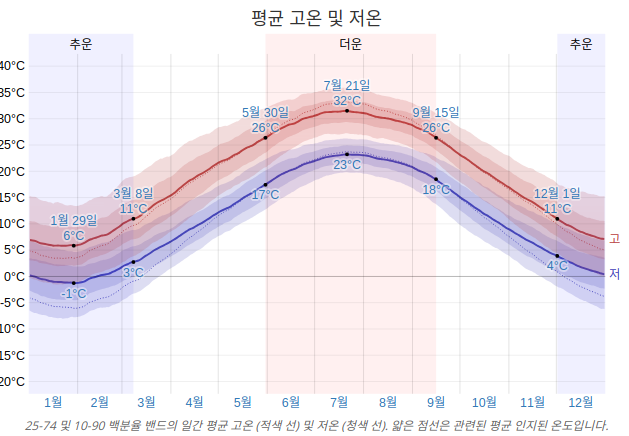

In [ ]:
df = pd.read_csv('maryland_accident_dataset.csv')

In [244]:
def split_season(data):
    mmdd = re.search('\d{4}-(\d{2}-\d{2})',data).group(1)
    if(mmdd <'03-08' or mmdd > '12-01'):
        return 'winter'
    elif(mmdd <'05-30'):
        return 'spring'
    elif(mmdd <'09-15'):
        return 'summer'
    elif(mmdd <'12-02'):
        return 'autumn'
     
df['SEASON'] = df['TIME'].map(lambda x: split_season(x))

file:///home/roadking/Pictures/maryland_fall_laves.png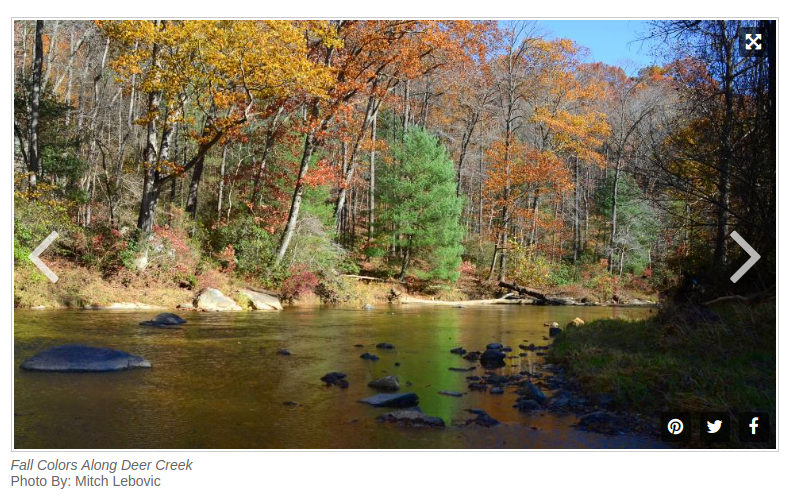

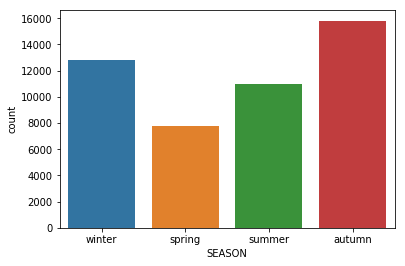

In [256]:
sns.countplot(x='SEASON',data=df)

In [245]:
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47400 entries, 0 to 47399
Data columns (total 28 columns):
CDL_FLAG                  47400 non-null object
CONDITION_CODE            47400 non-null object
EQUIP_PROB_CODE           47400 non-null object
FAULT_FLAG                47400 non-null object
INJ_SEVER_CODE            47400 non-null object
PERSON_ID                 47400 non-null object
PERSON_TYPE               47400 non-null object
REPORT_NO                 47400 non-null object
SAF_EQUIP_CODE            47400 non-null object
SEX_CODE                  47400 non-null object
VEHICLE_ID                47400 non-null object
COLLISION_TYPE_CODE       47400 non-null object
C_M_ZONE_FLAG             47400 non-null object
JUNCTION_CODE             47400 non-null object
LANE_CODE                 47400 non-null object
LIGHT_CODE                47400 non-null object
RD_COND_CODE              47400 non-null object
RD_DIV_CODE               47400 non-null object
SURF_COND_CODE            4

In [274]:
accident = df[df['FAULT_FLAG'] =='Y']

In [275]:
#accident = accident[['JUNCTION_CODE','SURF_COND_CODE','RD_COND_CODE','WEATHER_CODE']]
accident = accident[['WEATHER_CODE','SURF_COND_CODE','RD_COND_CODE']]

In [276]:
#dummy_accident = pd.get_dummies(accident,drop_first=True)
dummy_accident = pd.get_dummies(accident)

In [280]:
cluster = KMeans(n_clusters=4,n_init=20,max_iter=10000,random_state=1,n_jobs=4)

In [281]:
cluster.fit(dummy_accident)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10000,
    n_clusters=4, n_init=20, n_jobs=4, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [282]:
pd.Series(cluster.labels_).value_counts()

0    15422
2     3756
1     2201
3     1386
dtype: int64

In [283]:
dummy_accident['GROUP'] = cluster.labels_

In [284]:
clf = DecisionTreeClassifier(max_depth=7,random_state=2,max_leaf_nodes=5)

In [285]:
clf.fit(dummy_accident.iloc[:,:-1],dummy_accident.iloc[:,-1:])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=5, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=2, splitter='best')

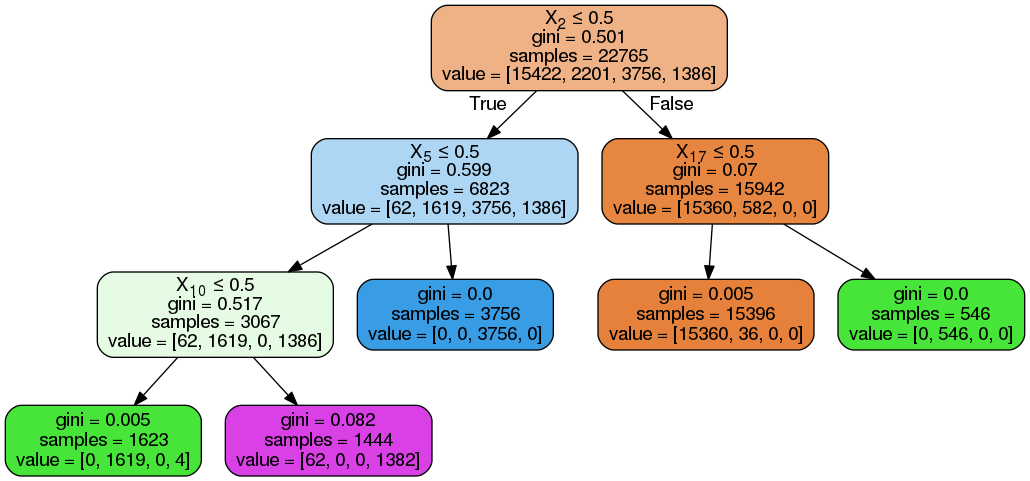

In [286]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [287]:
for i,v in enumerate(dummy_accident.columns):
    print(i,v)

0 WEATHER_CODE_Blowing Sand, Soil, Dirt
1 WEATHER_CODE_Blowing Snow
2 WEATHER_CODE_Clear
3 WEATHER_CODE_Cloudy
4 WEATHER_CODE_Foggy
5 WEATHER_CODE_Raining
6 WEATHER_CODE_Severe Winds
7 WEATHER_CODE_Sleet
8 WEATHER_CODE_Snow
9 WEATHER_CODE_Wintry Mix
10 SURF_COND_CODE_Dry
11 SURF_COND_CODE_Ice
12 SURF_COND_CODE_Mud, Dirt, Gravel
13 SURF_COND_CODE_Oil
14 SURF_COND_CODE_Slush
15 SURF_COND_CODE_Snow
16 SURF_COND_CODE_Water (standing/moving)
17 SURF_COND_CODE_Wet
18 RD_COND_CODE_Foreign Material
19 RD_COND_CODE_Holes, Ruts, Etc.
20 RD_COND_CODE_Loose Surface Material
21 RD_COND_CODE_No Defects
22 RD_COND_CODE_Obstruction Not Lighted
23 RD_COND_CODE_Obstruction Not Signaled
24 RD_COND_CODE_Shoulder Defect
25 RD_COND_CODE_View Obstructed
26 GROUP


In [288]:
clf.feature_importances_

array([0.        , 0.        , 0.55257488, 0.        , 0.        ,
       0.22355738, 0.        , 0.        , 0.        , 0.        ,
       0.13016437, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.09370337, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])